In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df.shape

(421570, 5)

In [4]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = pd.get_dummies(df, columns=['IsHoliday'], dtype=int, drop_first=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_True
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


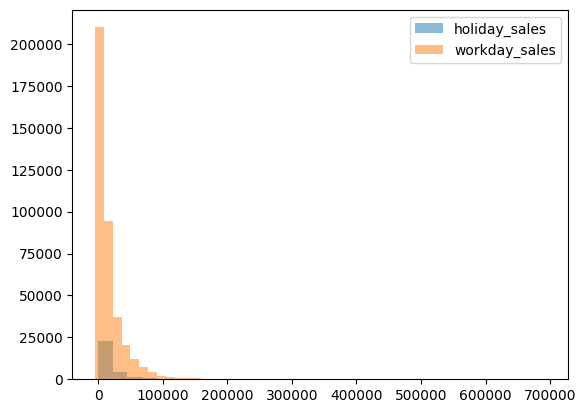

In [7]:
holiday_sales = df[df['IsHoliday_True']==1]['Weekly_Sales']
workday_sales = df[df['IsHoliday_True']==0]['Weekly_Sales']

plt.hist(holiday_sales, bins=30, alpha=0.5, label='holiday_sales')
plt.hist(workday_sales, bins=30, alpha=0.5, label='workday_sales')
plt.legend()
plt.show()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

In [9]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_True,Month
0,1,1,2010-02-05,24924.50,0,2
1,1,1,2010-02-12,46039.49,1,2
2,1,1,2010-02-19,41595.55,0,2
3,1,1,2010-02-26,19403.54,0,2
4,1,1,2010-03-05,21827.90,0,3


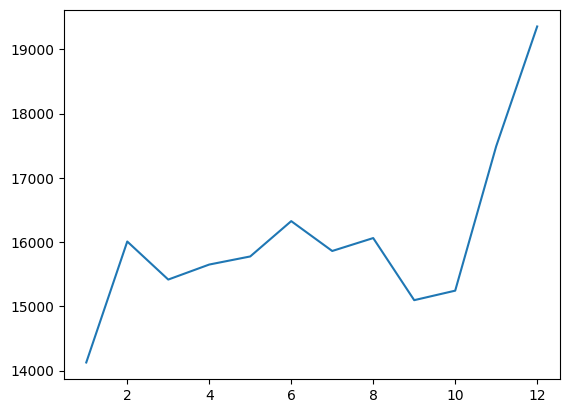

In [10]:
monthly_sales = df.groupby(['Month'])['Weekly_Sales'].mean().reset_index()
monthly_sales = monthly_sales.sort_values('Month')

plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'])
plt.show()

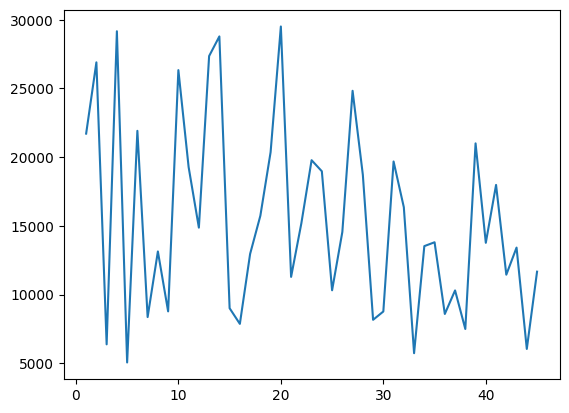

In [ ]:
stores_sales = df.groupby(['Store'])['Weekly_Sales'].mean().reset_index()
stores_sales = stores_sales.sort_values('Store')

plt.plot(stores_sales['Store'], stores_sales['Weekly_Sales'])
plt.show()

In [12]:
X = df.drop(columns=['Date', 'Weekly_Sales'])
y = df['Weekly_Sales']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(337256, 4)

In [15]:
X_val.shape

(84314, 4)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [17]:
model = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params':{}
    },

    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    },

    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    },

    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 20, None]
        }
    },

    'RandomForestRegressor': {
        'model': RandomForestRegressor(n_jobs=-1),
        'params': {
            'n_estimators': [50, 75, 100, 150],
            'max_depth': [5, 10, 20, None]
        }
    },

    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(n_jobs=-1),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },

    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 75, 100, 150],
            'learning_rate': [0.01, 0.1]
        }
    },

    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 75, 100, 150],
            'learning_rate': [0.01, 0.1]
        }
    }
}

In [18]:
for name, config in model.items():
    print(name)

    reg = GridSearchCV(config['model'], param_grid=config['params'], cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(X_val)

    print('Best paramaters: ',reg.best_params_)
    print('Best CV score: ',reg.best_score_)
    print('RMSE: ', root_mean_squared_error(y_val, y_pred))
    print('R2 score: ', r2_score(y_val, y_pred) ,'\n')

LinearRegression
Best paramaters:  {}
Best CV score:  -22327.820376370008
RMSE:  22483.14203874608
R2 score:  0.030642772391126782 

Ridge
Best paramaters:  {'alpha': 10}
Best CV score:  -22327.82035130933
RMSE:  22483.142150136035
R2 score:  0.030642762786004862 

Lasso
Best paramaters:  {'alpha': 0.1}
Best CV score:  -22327.820365931333
RMSE:  22483.14243342665
R2 score:  0.030642738357941735 

DecisionTreeRegressor
Best paramaters:  {'max_depth': None}
Best CV score:  -5067.399215317761
RMSE:  4703.152259728373
R2 score:  0.9575822212926554 

RandomForestRegressor
Best paramaters:  {'max_depth': None, 'n_estimators': 75}
Best CV score:  -4913.397931550999
RMSE:  4782.0603231086425
R2 score:  0.956146935790903 

KNeighborsRegressor
Best paramaters:  {'n_neighbors': 3}
Best CV score:  -5945.092372176874
RMSE:  5892.254214985603
R2 score:  0.933421685562184 

GradientBoostingRegressor
Best paramaters:  {'learning_rate': 0.1, 'n_estimators': 150}
Best CV score:  -12897.965873375091
RMSE

In [43]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [44]:
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.summary()

c:\Users\sibta\OneDrive\Desktop\sales_forecast\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,185 (43.69 KB)

 Trainable params: 11,185 (43.69 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=early_stopping, batch_size=64)

Epoch 1/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 522818944.0000 - mae: 14705.2588 - val_loss: 480463328.0000 - val_mae: 14509.5361
Epoch 2/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 470018112.0000 - mae: 14145.0264 - val_loss: 472201152.0000 - val_mae: 14270.2969
Epoch 3/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 466320672.0000 - mae: 14016.7402 - val_loss: 462221024.0000 - val_mae: 13964.2158
Epoch 4/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 460978080.0000 - mae: 13929.6689 - val_loss: 461751936.0000 - val_mae: 13235.3232
Epoch 5/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 453781568.0000 - mae: 13706.6299 - val_loss: 457054048.0000 - val_mae: 13718.3555
Epoch 6/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 445800032.0000 - mae: 13543.4141 - val_loss: 458409472.0000 - val_mae: 14492.2529
Epoch 7/100
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 454459168.0000 - mae: 13603.1475 - val_loss: 453024160.0000 - val_m

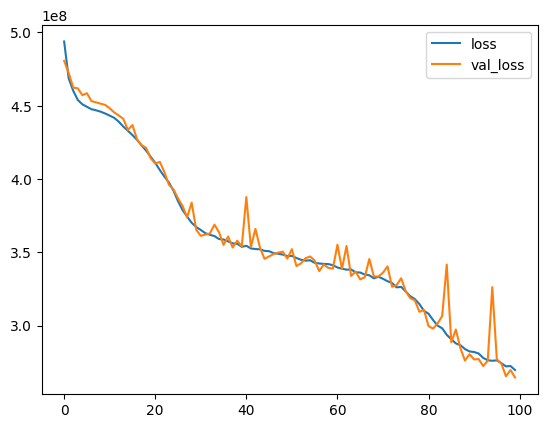

In [46]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [47]:
y_ann_pred = model.predict(X_val)
print('R2 score: ', r2_score(y_val, y_ann_pred))

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step
R2 score:  0.4854392563702349


In [49]:
dt_model = DecisionTreeRegressor(max_depth=None)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
test_df = pd.read_csv('./Data/test.csv')
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [52]:
test_df = pd.get_dummies(test_df, columns=['IsHoliday'], drop_first=True, dtype=int)
test_df['Date'] = pd.to_datetime(test_df['Date'])

test_df['Month'] = test_df['Date'].dt.month
test_df.head()

,Store,Dept,Date,IsHoliday_True,Month
0,1,1,2012-11-02,0,11
1,1,1,2012-11-09,0,11
2,1,1,2012-11-16,0,11
3,1,1,2012-11-23,1,11
4,1,1,2012-11-30,0,11


In [53]:
test_df.drop(columns=['Date'], inplace=True)
test_df.head()

,Store,Dept,IsHoliday_True,Month
0,1,1,0,11
1,1,1,0,11
2,1,1,0,11
3,1,1,1,11
4,1,1,0,11


In [59]:
print(dt_model.predict(test_df.iloc[[1]])) 

[22216.262]
